## Sales Prediction for Big Mart Outlets

* The data scientists at BigMart have collected 2013 sales data for 1559    products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

* Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

* Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

## Dataset description

* Item_Identifier	Unique product ID
* Item_Weight	Weight of product
* Item_Fat_Content	Whether the product is low fat or not
* Item_Visibility	The % of total display area of all products in a store allocated to the particular product
* Item_Type	The category to which the product belongs
* Item_MRP	Maximum Retail Price (list price) of the product
* Outlet_Identifier	Unique store ID
* Outlet_Establishment_Year	The year in which store was established
* Outlet_Size	The size of the store in terms of ground area covered
* Outlet_Location_Type	The type of city in which the store is located
* Outlet_Type	Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales	Sales of the product in the particular store. This is the outcome variable to be predicted.
 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd 
import datetime 
import time 
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression 
from scipy import stats
import scipy
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore") 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Read the dataset

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Big_mart_sales/train_XnW6LSF.csv')

In [ ]:
test_data = pd.read_csv('/content/gdrive/MyDrive/Big_mart_sales/test_FewQE9B.csv')

In [ ]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
# convert columns name into lowercase
test_data= test_data.rename(columns=str.lower)

In [ ]:
submission_final= pd.DataFrame(test_data[['item_identifier', 'outlet_identifier']])
submission_final.head(5)

,item_identifier,outlet_identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


## Explore the dataset

In [ ]:
print("number of rows:", data.shape[0])
print("number of columns:", data.shape[1])
print("name of columns:", data.columns)
print("\n")
data.head()

number of rows: 8523
number of columns: 12
name of columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# convert columns name into lowercase
data= data.rename(columns=str.lower)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                7060 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Checking missing values

In [ ]:
data.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [ ]:
test_data.isnull().sum()

item_identifier                 0
item_weight                   976
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1606
outlet_location_type            0
outlet_type                     0
dtype: int64

In [ ]:
data.nunique()

item_identifier              1559
item_weight                   415
item_fat_content                5
item_visibility              7880
item_type                      16
item_mrp                     5938
outlet_identifier              10
outlet_establishment_year       9
outlet_size                     3
outlet_location_type            3
outlet_type                     4
item_outlet_sales            3493
dtype: int64

#### Observation:

* we have missing values for two features
* since those two featuers are categorical we can impute with mode 

In [ ]:
# here we have to change outlet_establishment_year into datetime datatypes
data['outlet_establishment_year'] = pd.to_datetime(data['outlet_establishment_year'])

## Descriptive analysis

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
item_weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
item_visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
item_mrp,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
item_outlet_sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [ ]:
data.astype('object').describe().transpose()

,count,unique,top,freq
item_identifier,8523,1559,FDW13,10
item_weight,7060,415,12.15,86
item_fat_content,8523,5,Low Fat,5089
item_visibility,8523,7880,0,526
item_type,8523,16,Fruits and Vegetables,1232
item_mrp,8523,5938,172.042,7
outlet_identifier,8523,10,OUT027,935
outlet_establishment_year,8523,9,1970-01-01 00:00:00.000001985,1463
outlet_size,6113,3,Medium,2793
outlet_location_type,8523,3,Tier 3,3350


#### Observation:

* item outlet sales has outliers 
* most frequent product weight is 12.15 and it has 86 frequency
* most frequent product has low fat and it has 5089 frequency
* most frequent products are fruits & vegetables and it has 1232 ferquency
* most frequent product has 172.042 MRP 
* majority outlets are medium size with 2793 frequencies
* majority stores are in tier 3 with 3350 frequencies
* majority stores are supermarket type 1 with 5577 frequencies 

## Univariate Analysis

#### item_outlet_sales

Text(0.5, 1.0, 'units sales Distribution')

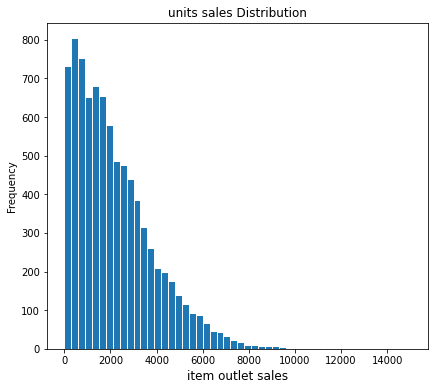

In [ ]:
plt.subplot(1, 2, 1)
(data['item_outlet_sales']).plot.hist(bins=50, figsize=(15, 6), edgecolor = 'white', range = [0, 15000])
plt.xlabel('item outlet sales', fontsize=12)
plt.title('units sales Distribution', fontsize=12)

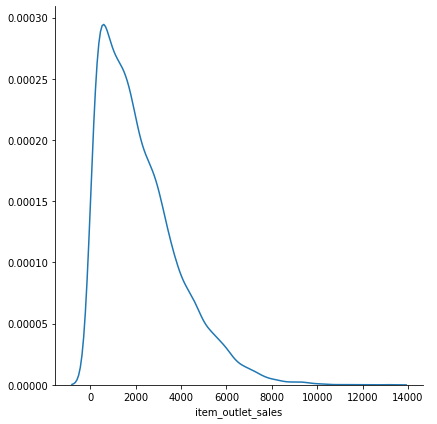

In [ ]:
#pdf of trip_duration
sns.FacetGrid(data,size=6) \
      .map(sns.kdeplot,"item_outlet_sales") \
      .add_legend();
plt.show();

### Observation: 

* Item outlet sales has right skwe dustribution and has some outliers so that we can apply log to make it gaussian distribution as most of machine learning models can work very well with gaussian distribution 
* majority item outlet sales lies between 0 to 3000 with many outliers

#### Outlier check

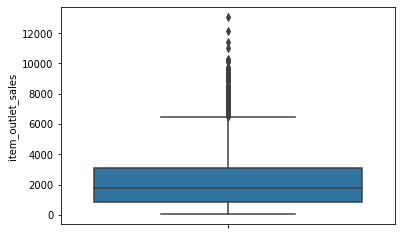

In [ ]:
# box-plot of item_outlet_sales with outliers
sns.boxplot(y="item_outlet_sales", data =data)
plt.show()

### Observation:

* we can clearly see outliers that we can remove it by applying log 

#### item_weight

Text(0.5, 1.0, 'item_weight Distribution')

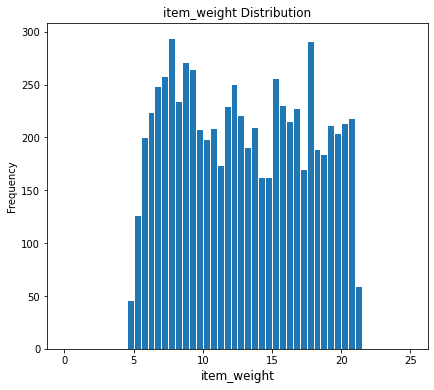

In [ ]:
plt.subplot(1, 2, 1)
(data['item_weight']).plot.hist(bins=50, figsize=(15, 6), edgecolor = 'white', range = [0, 25])
plt.xlabel('item_weight', fontsize=12)
plt.title('item_weight Distribution', fontsize=12)

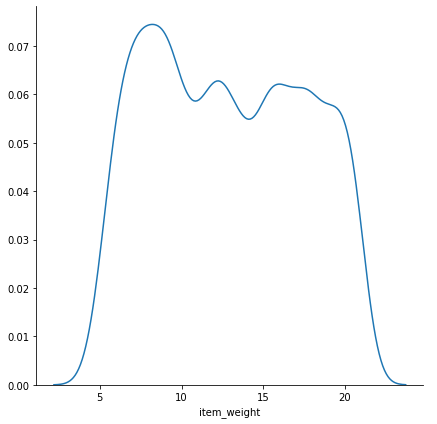

In [ ]:
#pdf of trip_duration
sns.FacetGrid(data,size=6) \
      .map(sns.kdeplot,"item_weight") \
      .add_legend();
plt.show();

#### Observation:

* Item weight has not a perfect gaussian distribution, we can see pattern like uniform distribution though it is not perfect uniform distribution 
* Majority item weights are between 7 to 20 

#### item_visibility

Text(0.5, 1.0, 'item_visibility Distribution')

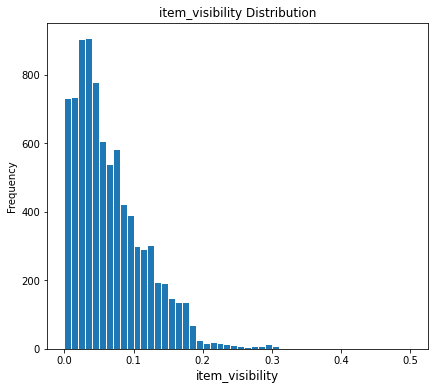

In [ ]:
plt.subplot(1, 2, 1)
(data['item_visibility']).plot.hist(bins=50, figsize=(15, 6), edgecolor = 'white', range = [0, 0.5])
plt.xlabel('item_visibility', fontsize=12)
plt.title('item_visibility Distribution', fontsize=12)

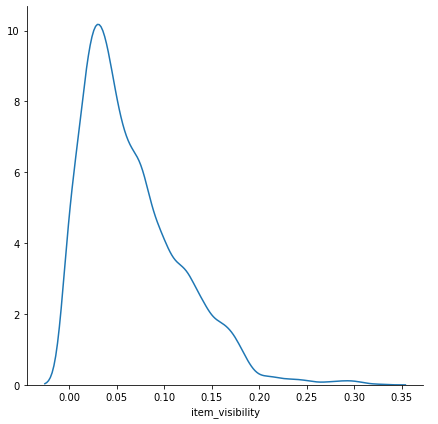

In [ ]:
#pdf of trip_duration
sns.FacetGrid(data,size=6) \
      .map(sns.kdeplot,"item_visibility") \
      .add_legend();
plt.show();

#### Observation:

* item visibility has right ske distribution and has some outliers as well
* we can apply log to get rid of outliers and make it more gaussian distribution
* majority item visibility score lies between 0.03 to 0.07

#### Check outlier of item_visibility

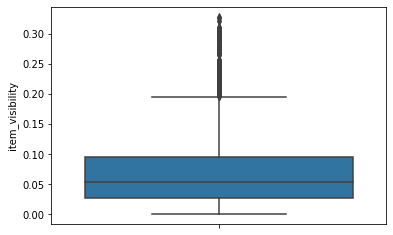

In [ ]:
# box-plot of item_outlet_sales with outliers
sns.boxplot(y="item_visibility", data =data)
plt.show()

#### Observation:

* Yes we have some outliers and we can remove it by applying log

#### item_mrp

Text(0.5, 1.0, 'item_mrp Distribution')

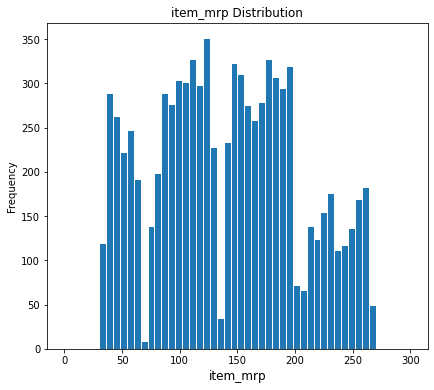

In [ ]:
plt.subplot(1, 2, 1)
(data['item_mrp']).plot.hist(bins=50, figsize=(15, 6), edgecolor = 'white', range = [0, 300])
plt.xlabel('item_mrp', fontsize=12)
plt.title('item_mrp Distribution', fontsize=12)

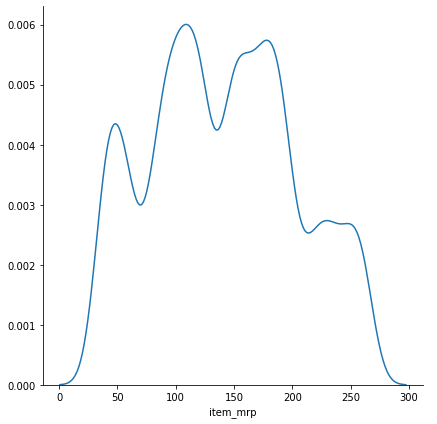

In [ ]:
#pdf of trip_duration
sns.FacetGrid(data,size=6) \
      .map(sns.kdeplot,"item_mrp") \
      .add_legend();
plt.show();

#### Observation:

* item mrp has very wide range and does not follow gaussian distribution 
* we can more relation in bivariate analysis 

#### Observation:

* item identifier has wide variety of products 
* after bivariate analysis, we will get more ider about relationship with other variables

#### item_fat_content

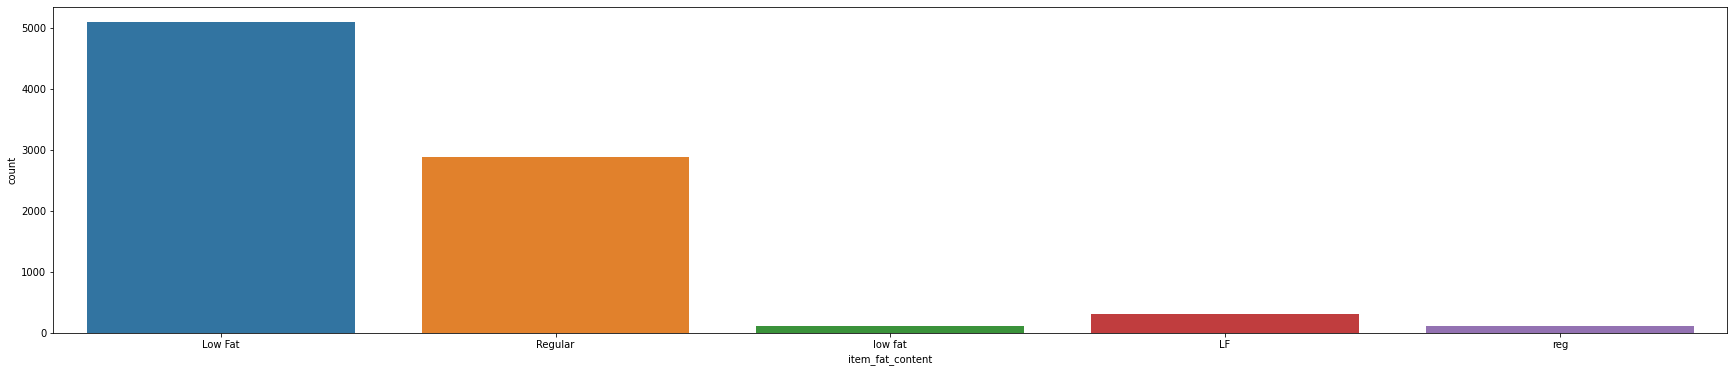

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='item_fat_content', data=data)

#### Observation:

* Item fat content has major five variety
* we have almoast 5000 products with low fat which is good
* Seocnd major category products have regualar fat which we have around 2800 products
* Rest category such as low fat, LF and reg has very few products around 100

#### item_type

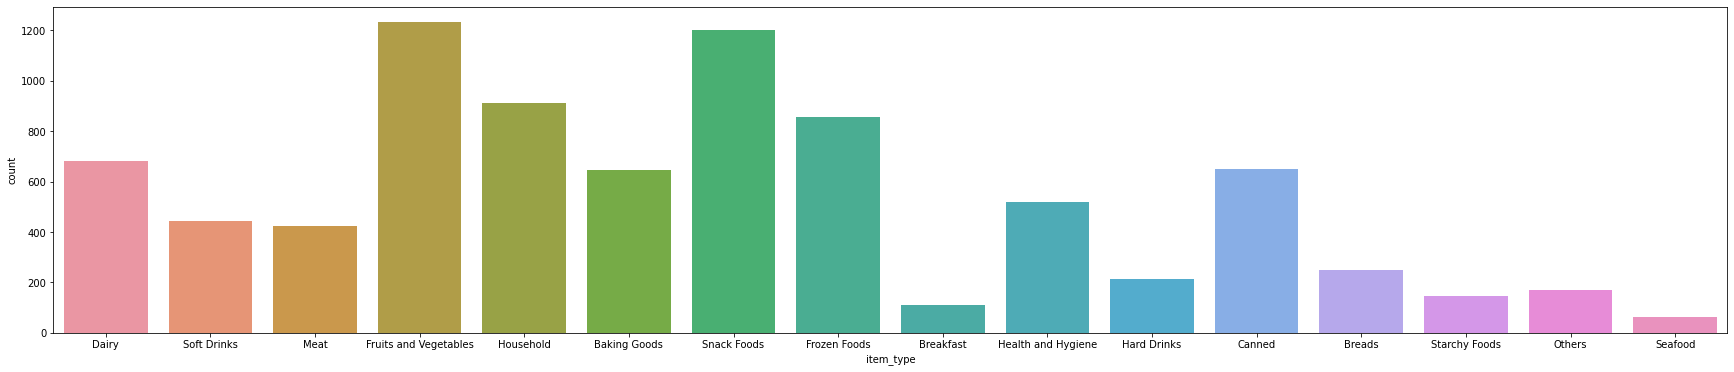

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='item_type', data=data)

#### Observation:

* item type has wide variety of products category

#### outlet_identifier

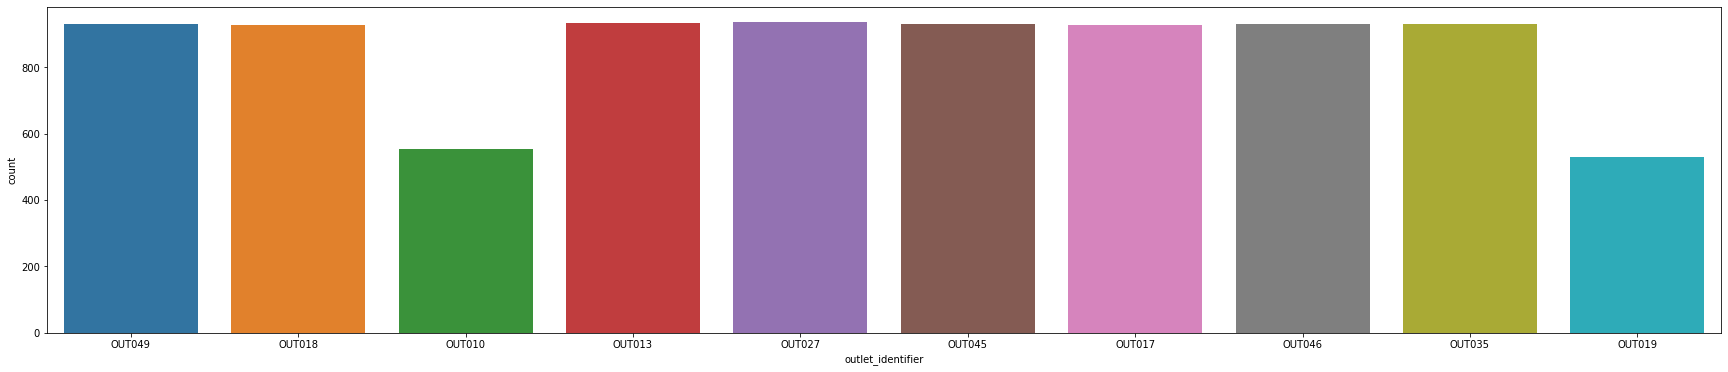

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='outlet_identifier', data=data)

#### outlet_size

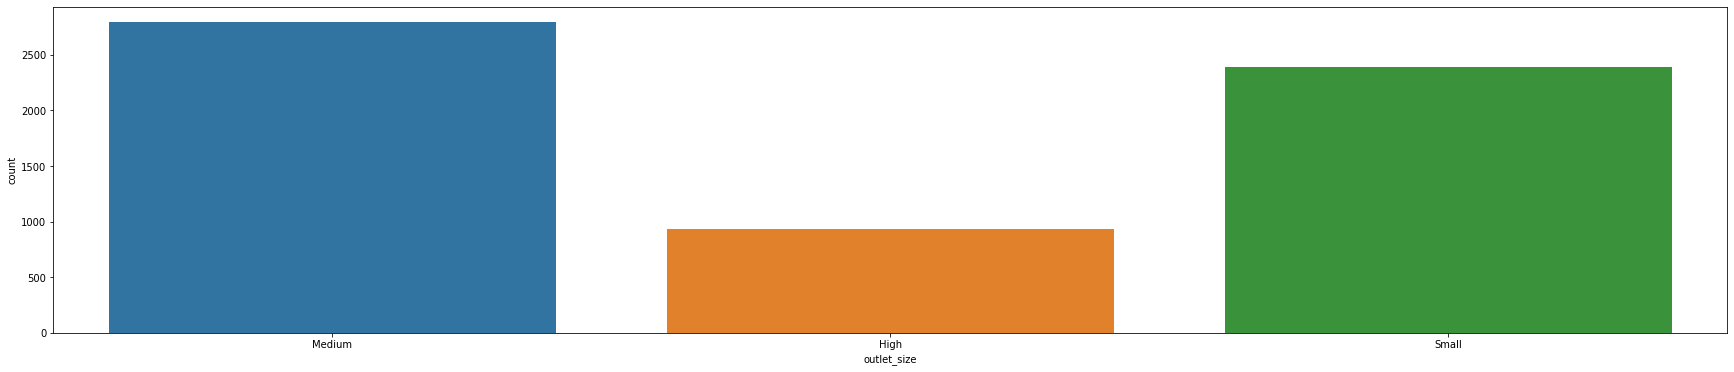

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='outlet_size', data=data)

#### Observation:

* we have three outlet size
* 2500 outlets are medium size
* 900 outlets are high size
* 2200 outlets are small size

#### outlet_location_type

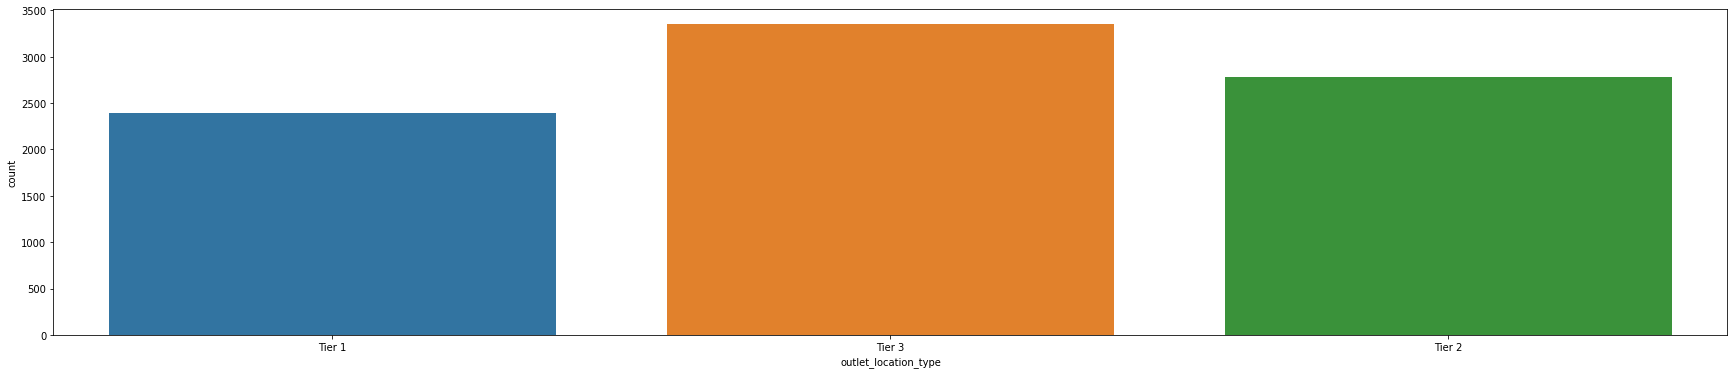

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='outlet_location_type', data=data)

#### Observation:

* Around 3400 outlets are in tier 3 region
* Around 2400 outlets are in tier 1 region
* Around 2700 outlets are in tier 2 region

#### outlet_type

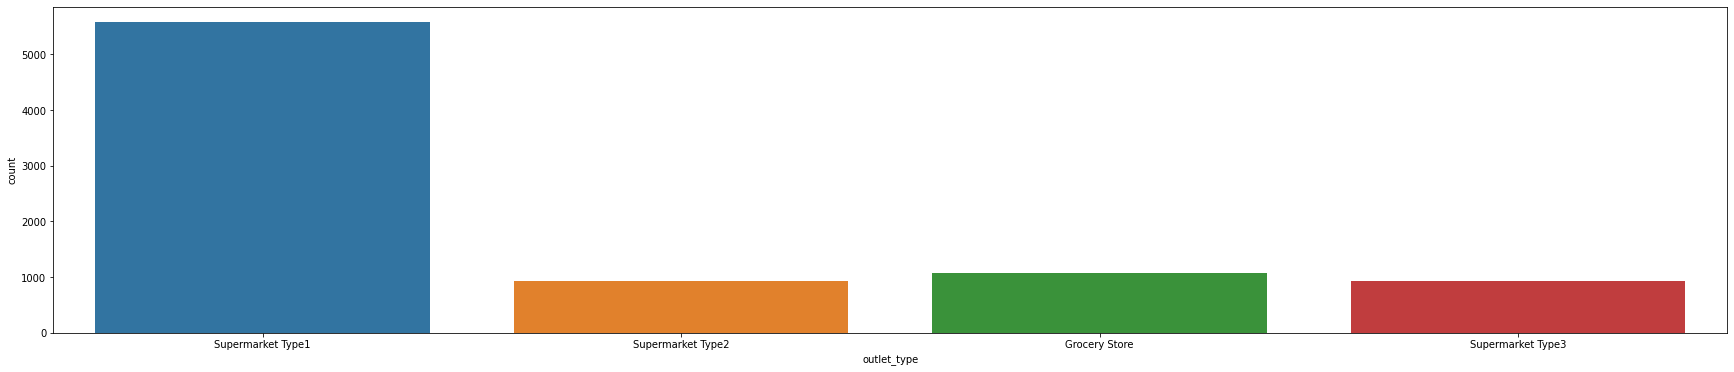

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='outlet_type', data=data)

#### Observation:

* Around 5600 outlets categories as supermarket type 1
* Around 900 outlets categories as supermarket type 2
* Around 1000 outlets categories as grocery store
* Around 900 outlets categories as supermarket type 3

## Bivariate Analysis

#### See each feature relation with target variable

#### See relationship between item weight to item outlet sales

No handles with labels found to put in legend.


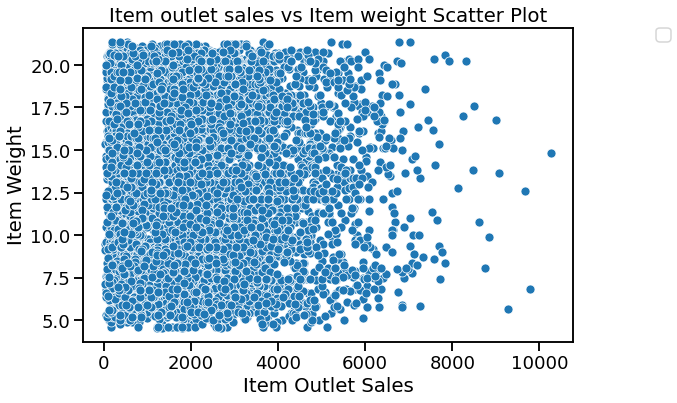

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="item_outlet_sales", y="item_weight", data=data, palette="Set2")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Item Weight")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Item outlet sales vs Item weight Scatter Plot")
plt.tight_layout()

#### Observation:

* There is no corelation between item wieght and item outlet sales

#### Find relationship between item outlet sales and item visibility

No handles with labels found to put in legend.


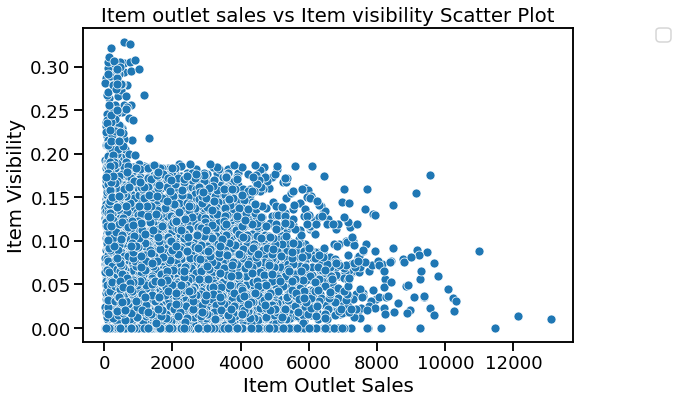

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="item_outlet_sales", y="item_visibility", data=data, palette="Set2")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Item Visibility")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Item outlet sales vs Item visibility Scatter Plot")
plt.tight_layout()

#### Observation:

* There is not clear corelation between two varivales 
* But we can see that we have very few sales when item visibility has more than 0.20
* However, below 0.20 item visibility we have almost same outlets sales 

#### Find relationship between item mrp and item outlet sales

No handles with labels found to put in legend.


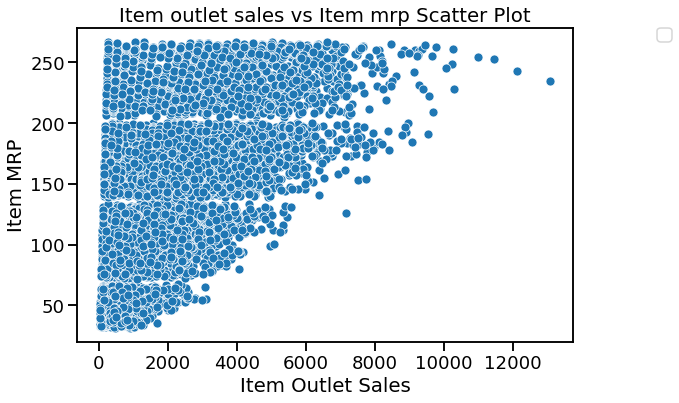

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="item_outlet_sales", y="item_mrp", data=data, palette="Set2")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Item MRP")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Item outlet sales vs Item mrp Scatter Plot")
plt.tight_layout()

#### Observation:

* We can see interesting relation that item outlet sales increasing with higher item mrp
* We can further inverstigate by checking product id so that we can get clear idea why this is happening 
* We can perform hypothesis testing to double check with our observation

#### Find the relationship between outlet establishment year and item outlet sales

No handles with labels found to put in legend.


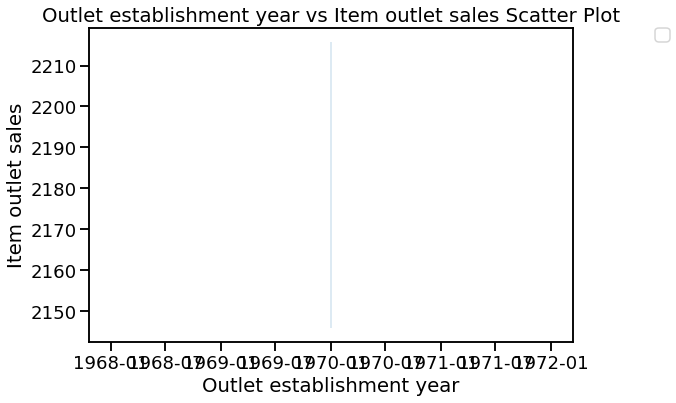

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.lineplot(x="outlet_establishment_year", y="item_outlet_sales", data=data, palette="Set2")
plt.xlabel("Outlet establishment year")
plt.ylabel("Item outlet sales")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Outlet establishment year vs Item outlet sales Scatter Plot")
plt.tight_layout()

#### Observation:

* There is not relationship between item outlet sales and outlet establishment year

#### Find relationship between item fat content and item outlet sales

Text(0.5, 1.0, 'Frequency of item outlet sales by each Item fat content')

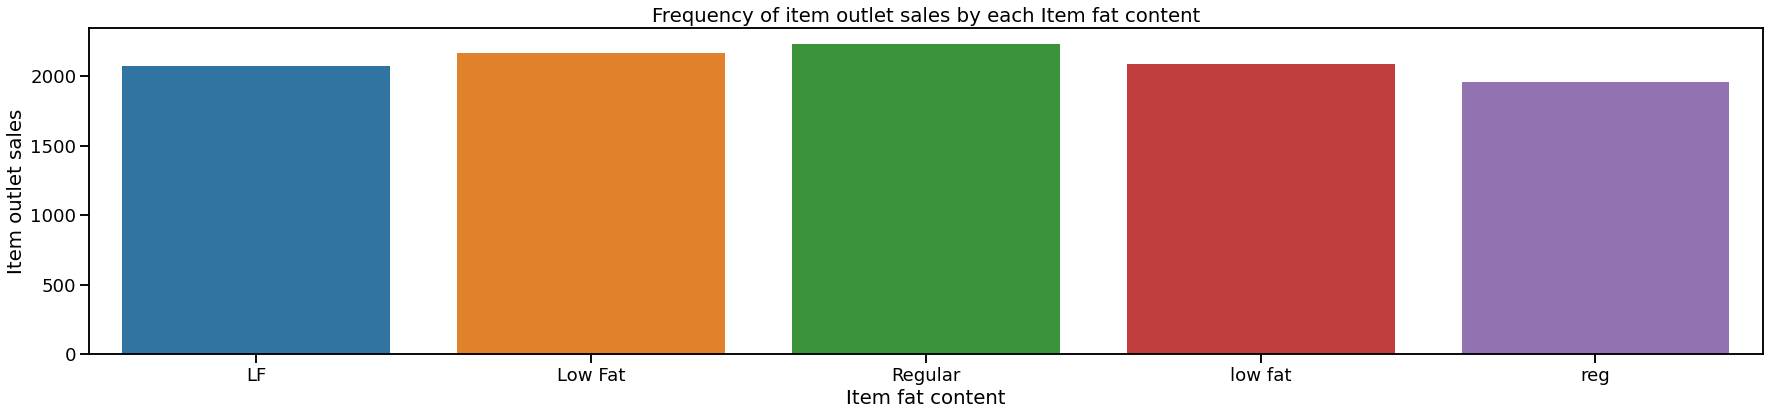

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(30, 6))
group_2=data.groupby('item_fat_content').item_outlet_sales.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Item outlet sales')
plt.xlabel('Item fat content')
plt.title('Frequency of item outlet sales by each Item fat content')

#### Observation:

* There is no corelation between item outlet sales and item fat content
* With all the variety of fat contnt we can see same sales 

#### Find the relationship between item type and item outlet sales

Text(0.5, 1.0, 'Frequency of item outlet sales by each Item type')

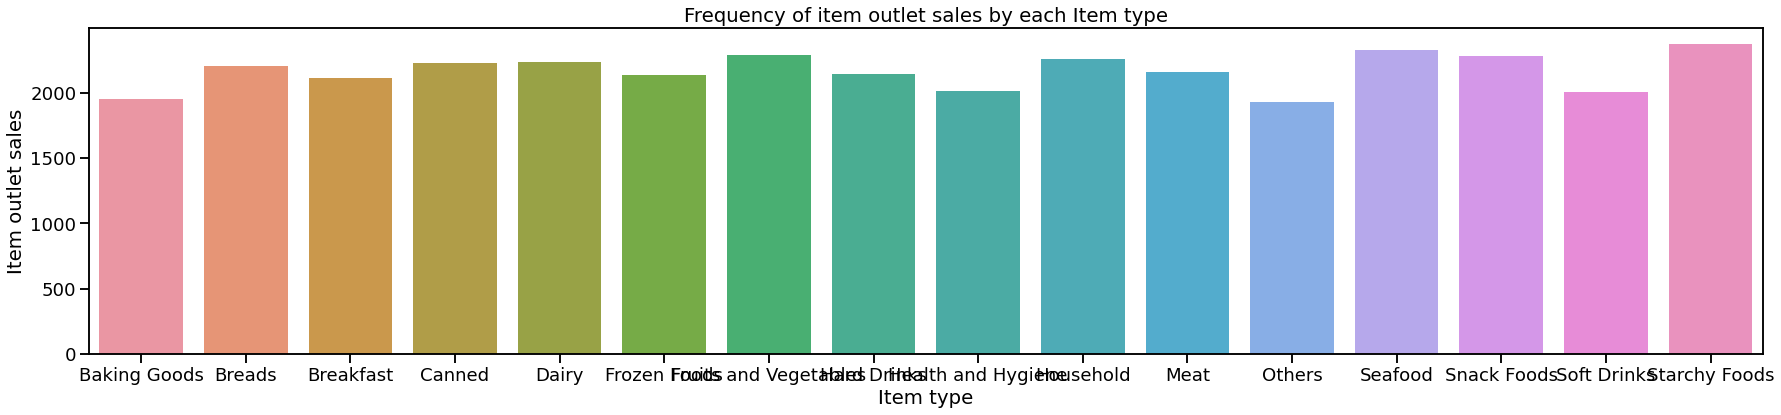

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(30, 6))
group_2=data.groupby('item_type').item_outlet_sales.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Item outlet sales')
plt.xlabel('Item type')
plt.title('Frequency of item outlet sales by each Item type')

#### Observation:

* There is no corelation between item type and item outlet sales 

#### Find relationship between outlet identifier and item outlet sales

Text(0.5, 1.0, 'Frequency of item outlet sales by each Outlet identifier')

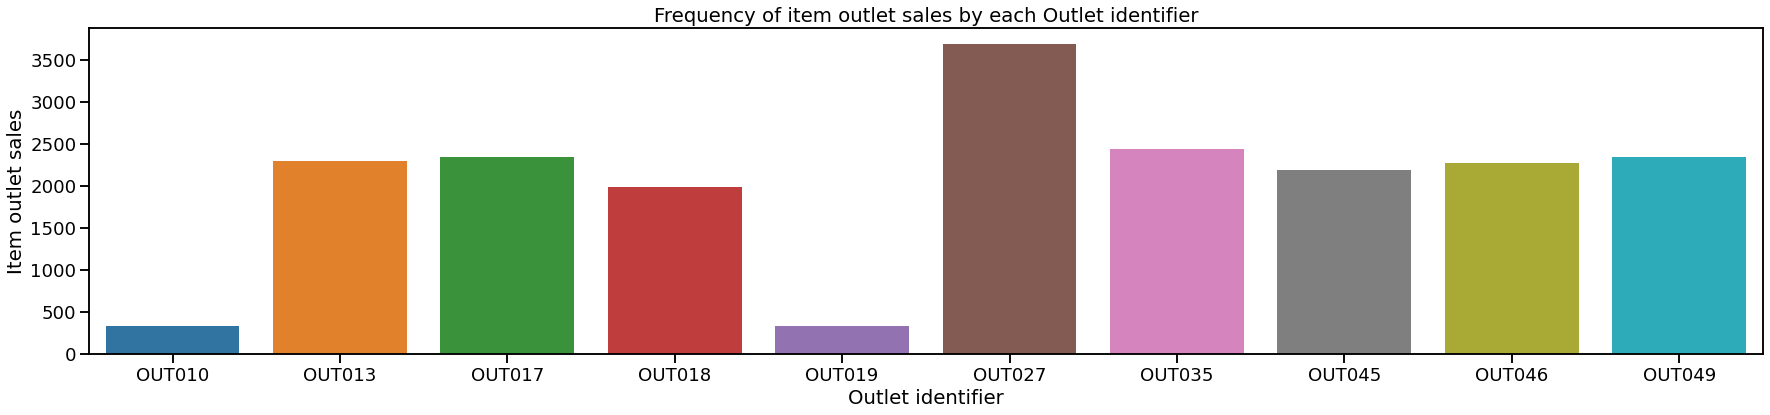

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(30, 6))
group_2=data.groupby('outlet_identifier').item_outlet_sales.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Item outlet sales')
plt.xlabel('Outlet identifier')
plt.title('Frequency of item outlet sales by each Outlet identifier')

#### Find relationship between outlet size and item outlet sales

Text(0.5, 1.0, 'Frequency of item outlet sales by each Outlet size')

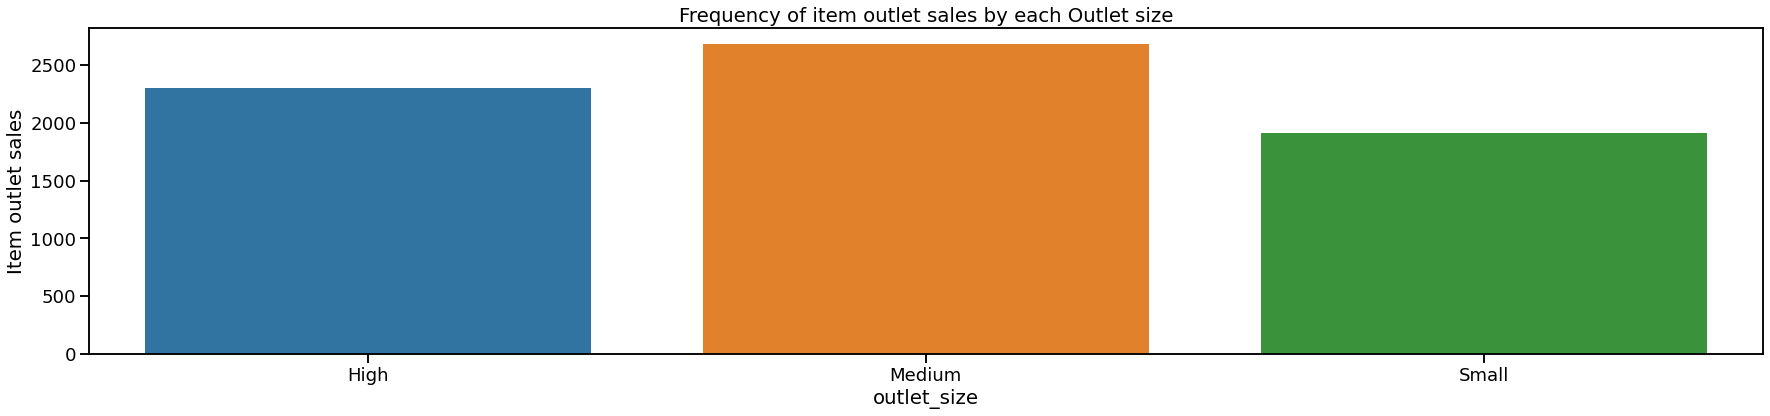

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(30, 6))
group_2=data.groupby('outlet_size').item_outlet_sales.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Item outlet sales')
plt.xlabel('outlet_size')
plt.title('Frequency of item outlet sales by each Outlet size')

#### Find relationship between outlet location type and item outlet sales

Text(0.5, 1.0, 'Frequency of item outlet sales by each Outlet location type')

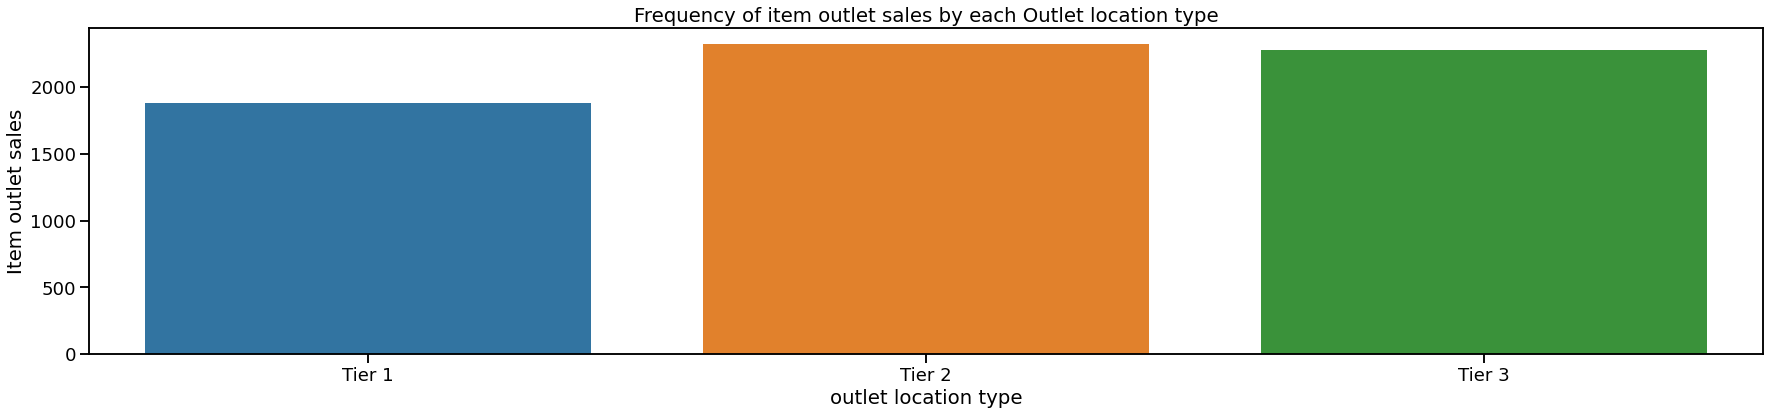

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(30, 6))
group_2=data.groupby('outlet_location_type').item_outlet_sales.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Item outlet sales')
plt.xlabel('outlet location type')
plt.title('Frequency of item outlet sales by each Outlet location type')

#### Find relationship between outlet type and item outlet sales

Text(0.5, 1.0, 'Frequency of item outlet sales by each Outlet type')

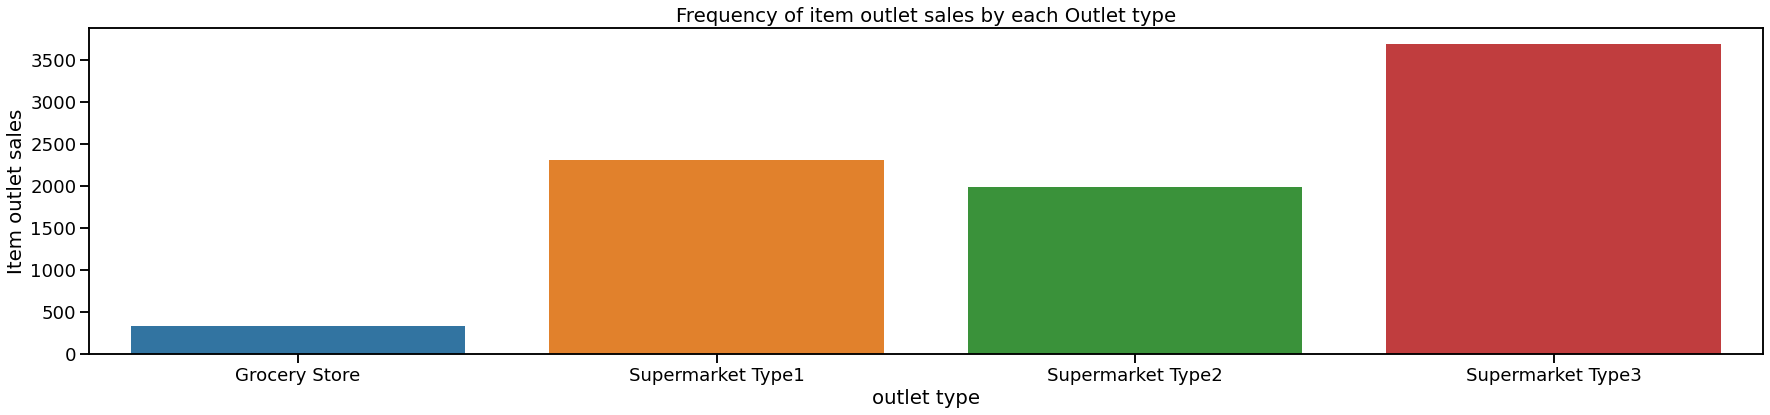

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(30, 6))
group_2=data.groupby('outlet_type').item_outlet_sales.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Item outlet sales')
plt.xlabel('outlet type')
plt.title('Frequency of item outlet sales by each Outlet type')

#### See relationship of all categorical features with price feature 

#### Find relationship between item fat content and item price

Text(0.5, 1.0, 'Frequency of item MRP by each Item fat content')

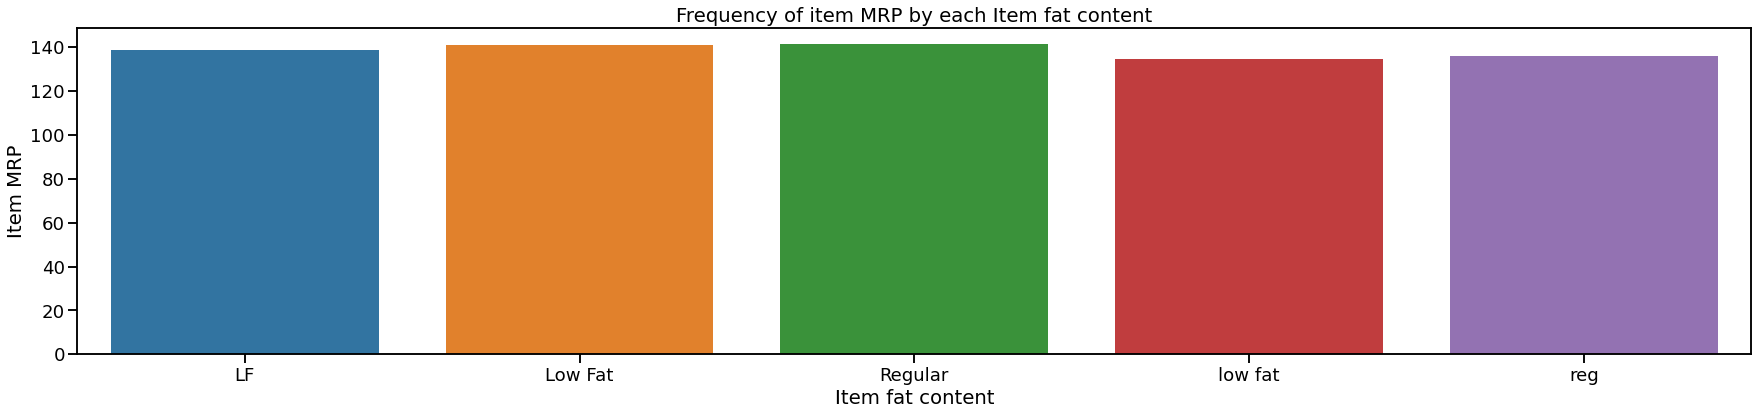

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(30, 6))
group_2=data.groupby('item_fat_content').item_mrp.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Item MRP')
plt.xlabel('Item fat content')
plt.title('Frequency of item MRP by each Item fat content')

#### Find relationship between item type and item price

Text(0.5, 1.0, 'Frequency of item MRP by each Item type')

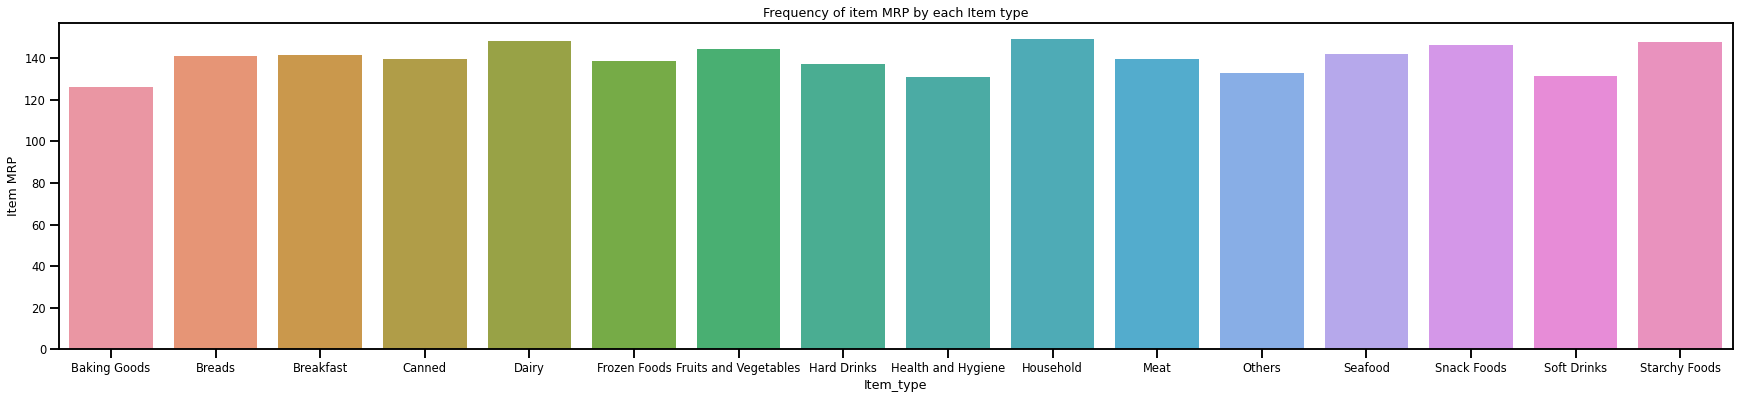

In [ ]:
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(30, 6))
group_2=data.groupby('item_type').item_mrp.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Item MRP')
plt.xlabel('Item_type')
plt.title('Frequency of item MRP by each Item type')

#### Find relationship between item type and item visibility

Text(0.5, 1.0, 'Frequency of item visibility by each Item type')

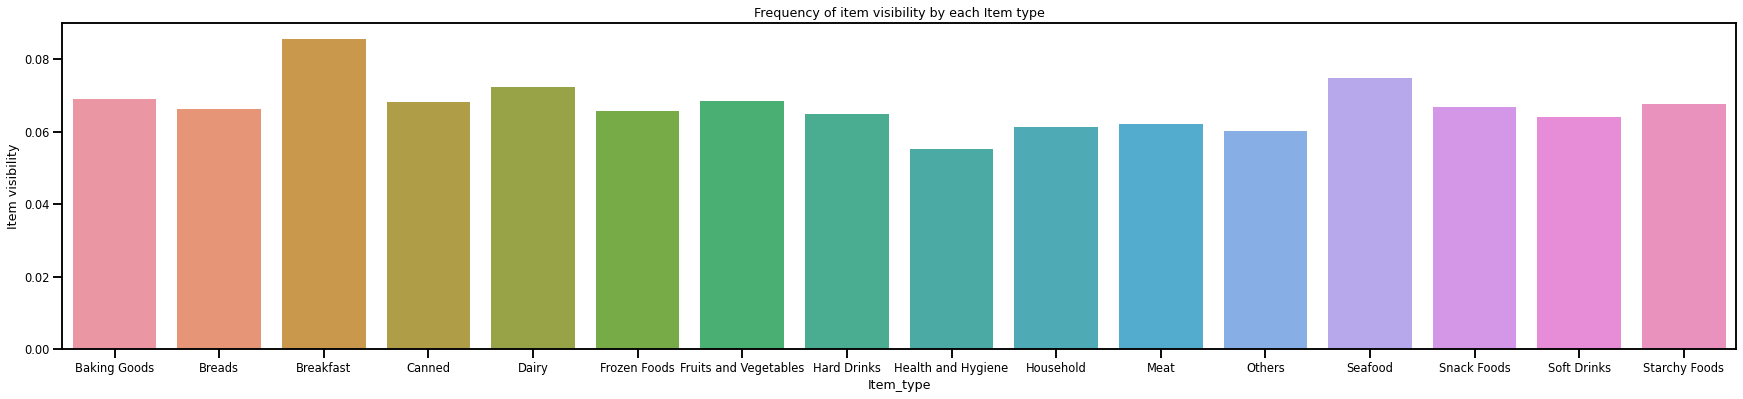

In [ ]:
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(30, 6))
group_2=data.groupby('item_type').item_visibility.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Item visibility')
plt.xlabel('Item_type')
plt.title('Frequency of item visibility by each Item type')

#### Find relationship between item type and item weight

Text(0.5, 1.0, 'Frequency of item weight by each Item type')

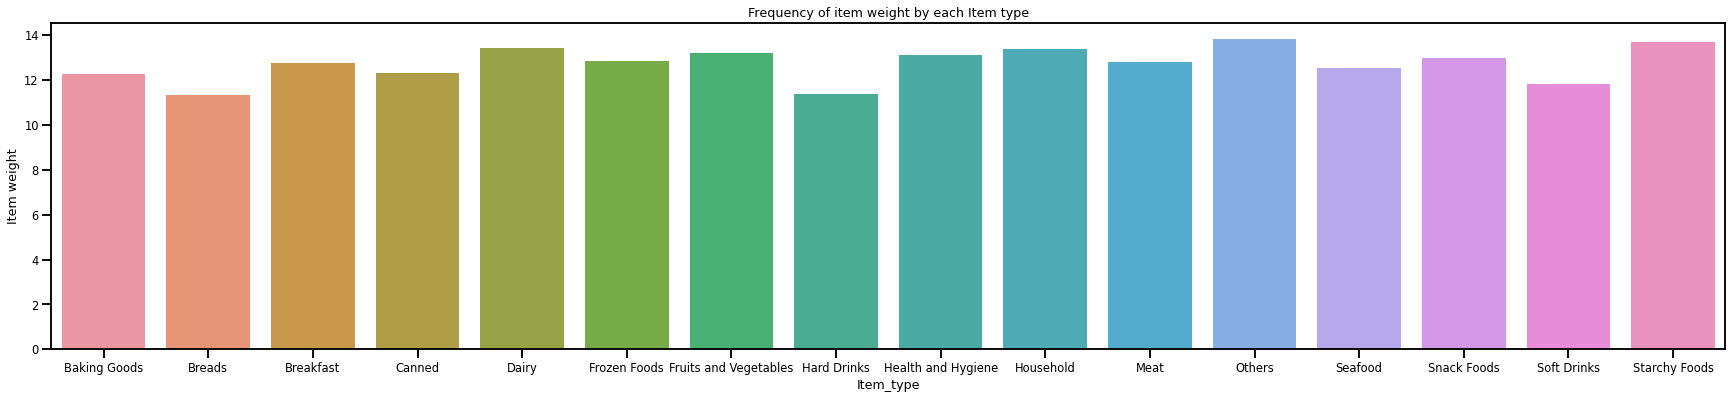

In [ ]:
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(30, 6))
group_2=data.groupby('item_type').item_weight.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Item weight')
plt.xlabel('Item_type')
plt.title('Frequency of item weight by each Item type')

#### Observation:

* Item mrp is changing with item category
* Breakfast and seafood has more item visibility than others
* item weight is changing with item type and it is very understandable

## Dealing with missing values and Impute using KNN 

#### we have two features item weight and outlet size with many missing values which we will impute using KNN model based imputer

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#### Train data

In [ ]:
data['outlet_size'].value_counts()

Medium    2793
Small     2388
High       932
Name: outlet_size, dtype: int64

In [ ]:
cat_label = data['outlet_size'].map({'Small': 0, 'Medium': 1, 'High': 2})
df = data['item_weight']
df = pd.concat([df, cat_label], axis=1)

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,item_weight,outlet_size
0,0.282525,0.5
1,0.081274,0.5
2,0.770765,0.5
3,0.871986,NaN
4,0.260494,1.0


In [ ]:
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
data = data.drop(['item_weight', 'outlet_size'], axis=1)
data = pd.concat([data, df], axis=1)
data.isnull().any(axis=0)

item_identifier              False
item_fat_content             False
item_visibility              False
item_type                    False
item_mrp                     False
outlet_identifier            False
outlet_establishment_year    False
outlet_location_type         False
outlet_type                  False
item_outlet_sales            False
item_weight                  False
outlet_size                  False
dtype: bool

#### Test data

In [ ]:
test_data['outlet_size'].value_counts()

Medium    1862
Small     1592
High       621
Name: outlet_size, dtype: int64

In [ ]:
tcat_label = test_data['outlet_size'].map({'Small': 0, 'Medium': 1, 'High': 2})
tdf = test_data['item_weight']
tdf = pd.concat([tdf, tcat_label], axis=1)

scaler = MinMaxScaler()
tdf = pd.DataFrame(scaler.fit_transform(tdf), columns = tdf.columns)
tdf.head()

,item_weight,outlet_size
0,0.964275,0.5
1,0.222983,NaN
2,0.598095,NaN
3,0.164335,NaN
4,NaN,0.5


In [ ]:
imputer = KNNImputer(n_neighbors=3)
tdf = pd.DataFrame(imputer.fit_transform(tdf), columns=tdf.columns)

In [ ]:
test_data = test_data.drop(['item_weight', 'outlet_size'], axis=1)
test_data = pd.concat([test_data, tdf], axis=1)
test_data.isnull().any(axis=0)

item_identifier              False
item_fat_content             False
item_visibility              False
item_type                    False
item_mrp                     False
outlet_identifier            False
outlet_establishment_year    False
outlet_location_type         False
outlet_type                  False
item_weight                  False
outlet_size                  False
dtype: bool

In [ ]:
test_data.to_csv('p_test.csv')
!cp p_test.csv "/content/gdrive/MyDrive/Big_mart_sales/p_test.csv"

## feature enginerring and feature transformation

#### Frequency encoding

#### item_fat_content

In [ ]:
temp = data['item_fat_content'].value_counts()
temp.head()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: item_fat_content, dtype: int64

In [ ]:
data['item_fat_content_count'] = data['item_fat_content'].apply(lambda x: temp[x])
data[['item_identifier', 'item_fat_content', 'item_fat_content_count']].head()

,item_identifier,item_fat_content,item_fat_content_count
0,FDA15,Low Fat,5089
1,DRC01,Regular,2889
2,FDN15,Low Fat,5089
3,FDX07,Regular,2889
4,NCD19,Low Fat,5089


#### Mean encoding using target variable, mrp and visibility features

In [ ]:
item_fat_mean_encoding = data.groupby(['item_fat_content']).agg({'item_outlet_sales':['mean']}).reset_index()

data = data.merge(item_fat_mean_encoding,on='item_fat_content',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales,item_weight,outlet_size,item_fat_content_count,"(item_outlet_sales, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336


In [ ]:
item_fat_visibility_mean_encoding = data.groupby(['item_fat_content']).agg({'item_visibility':['mean']}).reset_index()

data = data.merge(item_fat_visibility_mean_encoding,on='item_fat_content',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales,item_weight,outlet_size,item_fat_content_count,"(item_outlet_sales, mean)","(item_visibility, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166


In [ ]:
item_fat_price_mean_encoding = data.groupby(['item_fat_content']).agg({'item_mrp':['mean']}).reset_index()

data = data.merge(item_fat_price_mean_encoding,on='item_fat_content',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales,item_weight,outlet_size,item_fat_content_count,"(item_outlet_sales, mean)","(item_visibility, mean)","(item_mrp, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921


#### item_type

In [ ]:
temp1 = data['item_type'].value_counts()
temp1.head()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: item_type, dtype: int64

In [ ]:
data['item_type_count'] = data['item_type'].apply(lambda x: temp1[x])
data[['item_identifier', 'item_type', 'item_type_count']].head()

,item_identifier,item_type,item_type_count
0,FDA15,Dairy,682
1,DRC01,Soft Drinks,445
2,FDN15,Meat,425
3,FDX07,Fruits and Vegetables,1232
4,NCD19,Household,910


#### Mean encoding using target variable, mrp and visibility features

In [ ]:
item_type_mean_encoding = data.groupby(['item_type']).agg({'item_outlet_sales':['mean']}).reset_index()

data = data.merge(item_type_mean_encoding,on='item_type',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","(item_visibility, mean)","(item_mrp, mean)",item_type_count,"(item_outlet_sales_y, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300


In [ ]:
item_type_visibility_mean_encoding = data.groupby(['item_type']).agg({'item_visibility':['mean']}).reset_index()

data = data.merge(item_type_visibility_mean_encoding,on='item_type',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","(item_mrp, mean)",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322


In [ ]:
item_type_price_mean_encoding = data.groupby(['item_type']).agg({'item_mrp':['mean']}).reset_index()

data = data.merge(item_type_price_mean_encoding,on='item_type',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x,item_type,item_mrp_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753


#### outlet_identifier

In [ ]:
temp2 = data['outlet_identifier'].value_counts()
temp2.head()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
Name: outlet_identifier, dtype: int64

In [ ]:
data['outlet_identifier_count'] = data['outlet_identifier'].apply(lambda x: temp2[x])
data[['item_identifier', 'outlet_identifier', 'outlet_identifier_count']].head()

,item_identifier,outlet_identifier,outlet_identifier_count
0,FDA15,OUT049,930
1,DRC01,OUT018,928
2,FDN15,OUT049,930
3,FDX07,OUT010,555
4,NCD19,OUT013,932


#### Mean encoding using target variable, mrp and visibility features

In [ ]:
outlet_identifier_mean_encoding = data.groupby(['outlet_identifier']).agg({'item_outlet_sales_x':['mean']}).reset_index()

data = data.merge(outlet_identifier_mean_encoding,on='outlet_identifier',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x,item_type,item_mrp_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"(item_outlet_sales_x, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256


In [ ]:
outlet_identifier_visibility_mean_encoding = data.groupby(['outlet_identifier']).agg({'item_visibility_x':['mean']}).reset_index()

data = data.merge(outlet_identifier_visibility_mean_encoding,on='outlet_identifier',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x,item_type,item_mrp_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"(item_outlet_sales_x, mean)","(item_visibility_x, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957


In [ ]:
outlet_identifier_price_mean_encoding = data.groupby(['outlet_identifier']).agg({'item_mrp_x':['mean']}).reset_index()

data = data.merge(outlet_identifier_price_mean_encoding,on='outlet_identifier',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x,item_type,item_mrp_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"(item_outlet_sales_x, mean)","(item_visibility_x, mean)","(item_mrp_x, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982


#### outlet_size

In [ ]:
temp3 = data['outlet_size'].value_counts()
temp3.head()

0.5    5203
0.0    2388
1.0     932
Name: outlet_size, dtype: int64

In [ ]:
data['outlet_size_count'] = data['outlet_size'].apply(lambda x: temp3[x])
data[['item_identifier', 'outlet_size', 'outlet_size_count']].head()

,item_identifier,outlet_size,outlet_size_count
0,FDA15,0.5,5203
1,DRC01,0.5,5203
2,FDN15,0.5,5203
3,FDX07,0.5,5203
4,NCD19,1.0,932


#### Mean encoding using target variable, mrp and visibility features

In [ ]:
outlet_size_mean_encoding = data.groupby(['outlet_size']).agg({'item_outlet_sales_x':['mean']}).reset_index()

data = data.merge(outlet_size_mean_encoding,on='outlet_size',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x,item_type,item_mrp_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","(item_visibility_x, mean)","(item_mrp_x, mean)",outlet_size_count,"(item_outlet_sales_x_y, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256


In [ ]:
outlet_size_visibility_encoding = data.groupby(['outlet_size']).agg({'item_visibility_x':['mean']}).reset_index()

data = data.merge(outlet_size_visibility_encoding,on='outlet_size',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x,item_type,item_mrp_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","(item_mrp_x, mean)",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957


In [ ]:
outlet_size_price_encoding = data.groupby(['outlet_size']).agg({'item_mrp_x':['mean']}).reset_index()

data = data.merge(outlet_size_price_encoding,on='outlet_size',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x,item_type,item_mrp_x_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982


#### outlet_type

In [ ]:
temp5 = data['outlet_type'].value_counts()
temp5.head()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: outlet_type, dtype: int64

In [ ]:
data['outlet_type_count'] = data['outlet_type'].apply(lambda x: temp5[x])
data[['item_identifier', 'outlet_type', 'outlet_type_count']].head()

,item_identifier,outlet_type,outlet_type_count
0,FDA15,Supermarket Type1,5577
1,DRC01,Supermarket Type2,928
2,FDN15,Supermarket Type1,5577
3,FDX07,Grocery Store,1083
4,NCD19,Supermarket Type1,5577


#### Mean encoding using target variable, mrp and visibility features

In [ ]:
outlet_type_mean_encoding = data.groupby(['outlet_type']).agg({'item_outlet_sales_x_x':['mean']}).reset_index()

data = data.merge(outlet_type_mean_encoding,on='outlet_type',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x,item_type,item_mrp_x_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"(item_outlet_sales_x_x, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148


In [ ]:
outlet_type_visibility_mean_encoding = data.groupby(['outlet_type']).agg({'item_visibility_x_x':['mean']}).reset_index()

data = data.merge(outlet_type_visibility_mean_encoding,on='outlet_type',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x,item_type,item_mrp_x_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"(item_outlet_sales_x_x, mean)","(item_visibility_x_x, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739,0.061014
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500,0.104862
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148,0.060723


In [ ]:
outlet_type_price_mean_encoding = data.groupby(['outlet_type']).agg({'item_mrp_x_x':['mean']}).reset_index()

data = data.merge(outlet_type_price_mean_encoding,on='outlet_type',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x,item_type,item_mrp_x_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"(item_outlet_sales_x_x, mean)","(item_visibility_x_x, mean)","(item_mrp_x_x, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739,0.061014,141.678634
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500,0.104862,140.294688
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148,0.060723,141.213894


#### outlet_location_type

In [ ]:
temp6 = data['outlet_location_type'].value_counts()
temp6.head()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: outlet_location_type, dtype: int64

In [ ]:
data['outlet_location_type_count'] = data['outlet_location_type'].apply(lambda x: temp6[x])
data[['item_identifier', 'outlet_location_type', 'outlet_location_type_count']].head()

,item_identifier,outlet_location_type,outlet_location_type_count
0,FDA15,Tier 1,2388
1,DRC01,Tier 3,3350
2,FDN15,Tier 1,2388
3,FDX07,Tier 3,3350
4,NCD19,Tier 3,3350


#### Mean encoding using target variable, mrp and visibility features

In [ ]:
outlet_location_type_mean_encoding = data.groupby(['outlet_location_type']).agg({'item_outlet_sales_x_x':['mean']}).reset_index()

data = data.merge(outlet_location_type_mean_encoding,on='outlet_location_type',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x,item_type,item_mrp_x_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"('item_outlet_sales_x_x', 'mean')_x","(item_visibility_x_x, mean)","(item_mrp_x_x, mean)",outlet_location_type_count,"(item_outlet_sales_x_x_y, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739,0.061014,141.678634,3350,2279.627651
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500,0.104862,140.294688,3350,2279.627651
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148,0.060723,141.213894,3350,2279.627651


In [ ]:
outlet_location_type_visibility_mean_encoding = data.groupby(['outlet_location_type']).agg({'item_visibility_x_x':['mean']}).reset_index()

data = data.merge(outlet_location_type_visibility_mean_encoding,on='outlet_location_type',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x_x,item_type,item_mrp_x_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"('item_outlet_sales_x_x', 'mean')_x","('item_visibility_x_x', 'mean')_x","(item_mrp_x_x, mean)",outlet_location_type_count,"(item_outlet_sales_x_x_y, mean)","(item_visibility_x_x_y, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739,0.061014,141.678634,3350,2279.627651,0.066751
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500,0.104862,140.294688,3350,2279.627651,0.066751
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148,0.060723,141.213894,3350,2279.627651,0.066751


In [ ]:
outlet_location_type_price_mean_encoding = data.groupby(['outlet_location_type']).agg({'item_mrp_x_x':['mean']}).reset_index()

data = data.merge(outlet_location_type_price_mean_encoding,on='outlet_location_type',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x_x,item_type,item_mrp_x_x_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"('item_outlet_sales_x_x', 'mean')_x","('item_visibility_x_x', 'mean')_x","('item_mrp_x_x', 'mean')_x",outlet_location_type_count,"(item_outlet_sales_x_x_y, mean)","(item_visibility_x_x_y, mean)","(item_mrp_x_x_y, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739,0.061014,141.678634,3350,2279.627651,0.066751,140.935232
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500,0.104862,140.294688,3350,2279.627651,0.066751,140.935232
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148,0.060723,141.213894,3350,2279.627651,0.066751,140.935232


#### Item identifier

In [ ]:
temp7 = data['item_identifier'].value_counts()
temp7.head()

FDW13    10
FDG33    10
FDV38     9
FDX20     9
FDT07     9
Name: item_identifier, dtype: int64

In [ ]:
data['item_identifier_count'] = data['item_identifier'].apply(lambda x: temp7[x])
data[['item_identifier', 'item_identifier_count']].head()

,item_identifier,item_identifier_count
0,FDA15,8
1,DRC01,6
2,FDN15,7
3,FDX07,6
4,NCD19,6


In [ ]:
for i in range(0, len(data)):
    if data['item_identifier_count'][i] < 4:
        data['item_identifier'][i] = 'other'

In [ ]:
data['item_identifier'].value_counts()

other    418
FDW13     10
FDG33     10
NCJ30      9
FDQ40      9
        ... 
FDI27      4
FDA35      4
FDO04      4
NCM19      4
DRO59      4
Name: item_identifier, Length: 1403, dtype: int64

In [ ]:
item_identifier_mean_encoding = data.groupby(['item_identifier']).agg({'item_outlet_sales_x_x_x':['mean']}).reset_index()

data = data.merge(item_identifier_mean_encoding,on='item_identifier',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x_x,item_type,item_mrp_x_x_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"('item_outlet_sales_x_x', 'mean')_x","('item_visibility_x_x', 'mean')_x","('item_mrp_x_x', 'mean')_x",outlet_location_type_count,"(item_outlet_sales_x_x_y, mean)","(item_visibility_x_x_y, mean)","(item_mrp_x_x_y, mean)",item_identifier_count,"(item_outlet_sales_x_x_x, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106,8,5198.067050
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739,0.061014,141.678634,3350,2279.627651,0.066751,140.935232,6,862.211000
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106,7,1478.076000
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500,0.104862,140.294688,3350,2279.627651,0.066751,140.935232,6,3021.067500
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148,0.060723,141.213894,3350,2279.627651,0.066751,140.935232,6,653.926567


In [ ]:
item_identifier_visibility_mean_encoding = data.groupby(['item_identifier']).agg({'item_visibility_x_x_x':['mean']}).reset_index()

data = data.merge(item_identifier_visibility_mean_encoding,on='item_identifier',how='left')

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x_x,item_type,item_mrp_x_x_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"('item_outlet_sales_x_x', 'mean')_x","('item_visibility_x_x', 'mean')_x","('item_mrp_x_x', 'mean')_x",outlet_location_type_count,"(item_outlet_sales_x_x_y, mean)","(item_visibility_x_x_y, mean)","(item_mrp_x_x_y, mean)",item_identifier_count,"(item_outlet_sales_x_x_x, mean)","(item_visibility_x_x_x, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106,8,5198.067050,0.017387
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739,0.061014,141.678634,3350,2279.627651,0.066751,140.935232,6,862.211000,0.019219
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106,7,1478.076000,0.020145
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500,0.104862,140.294688,3350,2279.627651,0.066751,140.935232,6,3021.067500,0.015274
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148,0.060723,141.213894,3350,2279.627651,0.066751,140.935232,6,653.926567,0.008082


In [ ]:
item_identifier_price_mean_encoding = data.groupby(['item_identifier']).agg({'item_mrp_x_x_x':['mean']}).reset_index()

data = data.merge(item_identifier_price_mean_encoding,on='item_identifier',how='left')

In [ ]:
#data = data.drop('item_identifier', axis=1)

In [ ]:
data.head()

,item_identifier,item_fat_content,item_visibility_x_x_x,item_type,item_mrp_x_x_x,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales_x_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"('item_outlet_sales_x_x', 'mean')_x","('item_visibility_x_x', 'mean')_x","('item_mrp_x_x', 'mean')_x",outlet_location_type_count,"(item_outlet_sales_x_x_y, mean)","(item_visibility_x_x_y, mean)","(item_mrp_x_x_y, mean)",item_identifier_count,"(item_outlet_sales_x_x_x, mean)","(item_visibility_x_x_x, mean)","(item_mrp_x_x_x, mean)"
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106,8,5198.067050,0.017387,249.496700
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Tier 3,Supermarket Type2,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739,0.061014,141.678634,3350,2279.627651,0.066751,140.935232,6,862.211000,0.019219,48.969200
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Tier 1,Supermarket Type1,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106,7,1478.076000,0.020145,140.432286
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,Tier 3,Grocery Store,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500,0.104862,140.294688,3350,2279.627651,0.066751,140.935232,6,3021.067500,0.015274,182.928333
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,Tier 3,Supermarket Type1,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148,0.060723,141.213894,3350,2279.627651,0.066751,140.935232,6,653.926567,0.008082,55.044733


## Data preprocessing

#### Label encoding

In [ ]:
data['item_fat_content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: item_fat_content, dtype: int64

In [ ]:
# label encoding for categorical data
data['item_fat_content'] = data['item_fat_content'].map({'low fat': 0,'reg': 1,'LF': 2, 'Regular': 3, 'Low Fat': 4})
data['item_fat_content'].head()

0    4
1    3
2    4
3    3
4    4
Name: item_fat_content, dtype: int64

In [ ]:
data['outlet_type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: outlet_type, dtype: int64

In [ ]:
data['outlet_type'] = data['outlet_type'].map({'Supermarket Type2': 0,'Supermarket Type3': 1,'Grocery Store': 2, 'Supermarket Type1': 3})
data['outlet_type'].head()

0    3
1    0
2    3
3    2
4    3
Name: outlet_type, dtype: int64

#### One hot encoding

In [ ]:
data = pd.get_dummies(data, columns=['item_identifier','item_type','outlet_identifier','outlet_location_type'])
data.head()

,item_fat_content,item_visibility_x_x_x,item_mrp_x_x_x,outlet_establishment_year,outlet_type,item_outlet_sales_x_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"('item_outlet_sales_x_x', 'mean')_x","('item_visibility_x_x', 'mean')_x","('item_mrp_x_x', 'mean')_x",outlet_location_type_count,"(item_outlet_sales_x_x_y, mean)","(item_visibility_x_x_y, mean)","(item_mrp_x_x_y, mean)",item_identifier_count,"(item_outlet_sales_x_x_x, mean)","(item_visibility_x_x_x, mean)","(item_mrp_x_x_x, mean)",item_identifier_DRA12,item_identifier_DRA24,item_identifier_DRA59,item_identifier_DRB13,...,item_identifier_NCY54,item_identifier_NCZ06,item_identifier_NCZ17,item_identifier_NCZ18,item_identifier_NCZ29,item_identifier_NCZ30,item_identifier_NCZ41,item_identifier_NCZ42,item_identifier_NCZ53,item_identifier_NCZ54,item_identifier_other,item_type_Baking Goods,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,item_type_Fruits and Vegetables,item_type_Hard Drinks,item_type_Health and Hygiene,item_type_Household,item_type_Meat,item_type_Others,item_type_Seafood,item_type_Snack Foods,item_type_Soft Drinks,item_type_Starchy Foods,outlet_identifier_OUT010,outlet_identifier_OUT013,outlet_identifier_OUT017,outlet_identifier_OUT018,outlet_identifier_OUT019,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,outlet_location_type_Tier 1,outlet_location_type_Tier 2,outlet_location_type_Tier 3
0,4,0.016047,249.8092,1970-01-01 00:00:00.000001999,3,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106,8,5198.067050,0.017387,249.496700,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,3,0.019278,48.2692,1970-01-01 00:00:00.000002009,0,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739,0.061014,141.678634,3350,2279.627651,0.066751,140.935232,6,862.211000,0.019219,48.969200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,4,0.016760,141.6180,1970-01-01 00:00:00.000001999,3,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106,7,1478.076000,0.020145,140.432286,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,3,0.000000,182.0950,1970-01-01 00:00:00.000001998,2,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500,0.104862,140.294688,3350,2279.627651,0.066751,140.935232,6,3021.067500,0.015274,182.928333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0.000000,53.8614,1970-01-01 00:00:00.000001987,3,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148,0.060723,141.213894,3350,2279.627651,0.066751,140.935232,6,653.926567,0.008082,55.044733,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [ ]:
data.head()

,item_fat_content,item_visibility_x_x_x,item_mrp_x_x_x,outlet_establishment_year,outlet_type,item_outlet_sales_x_x_x,item_weight,outlet_size,item_fat_content_count,"('item_outlet_sales', 'mean')_x","('item_visibility', 'mean')_x","('item_mrp', 'mean')_x",item_type_count,"(item_outlet_sales_y, mean)","(item_visibility_y, mean)","(item_mrp_y, mean)",outlet_identifier_count,"('item_outlet_sales_x', 'mean')_x","('item_visibility_x', 'mean')_x","('item_mrp_x', 'mean')_x",outlet_size_count,"(item_outlet_sales_x_y, mean)","(item_visibility_x_y, mean)","(item_mrp_x_y, mean)",outlet_type_count,"('item_outlet_sales_x_x', 'mean')_x","('item_visibility_x_x', 'mean')_x","('item_mrp_x_x', 'mean')_x",outlet_location_type_count,"(item_outlet_sales_x_x_y, mean)","(item_visibility_x_x_y, mean)","(item_mrp_x_x_y, mean)",item_identifier_count,"(item_outlet_sales_x_x_x, mean)","(item_visibility_x_x_x, mean)","(item_mrp_x_x_x, mean)",item_identifier_DRA12,item_identifier_DRA24,item_identifier_DRA59,item_identifier_DRB13,...,item_identifier_NCY54,item_identifier_NCZ06,item_identifier_NCZ17,item_identifier_NCZ18,item_identifier_NCZ29,item_identifier_NCZ30,item_identifier_NCZ41,item_identifier_NCZ42,item_identifier_NCZ53,item_identifier_NCZ54,item_identifier_other,item_type_Baking Goods,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,item_type_Fruits and Vegetables,item_type_Hard Drinks,item_type_Health and Hygiene,item_type_Household,item_type_Meat,item_type_Others,item_type_Seafood,item_type_Snack Foods,item_type_Soft Drinks,item_type_Starchy Foods,outlet_identifier_OUT010,outlet_identifier_OUT013,outlet_identifier_OUT017,outlet_identifier_OUT018,outlet_identifier_OUT019,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,outlet_location_type_Tier 1,outlet_location_type_Tier 2,outlet_location_type_Tier 3
0,4,0.016047,249.8092,1970-01-01 00:00:00.000001999,3,3735.1380,0.282525,0.5,5089,2164.477336,0.064166,140.968921,682,2232.542597,0.072427,148.499208,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106,8,5198.067050,0.017387,249.496700,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,3,0.019278,48.2692,1970-01-01 00:00:00.000002009,0,443.4228,0.081274,0.5,2889,2235.186702,0.069564,141.714476,445,2006.511735,0.063972,131.492506,928,1995.498739,0.061014,141.678634,5203,2283.730470,0.064828,140.466578,928,1995.498739,0.061014,141.678634,3350,2279.627651,0.066751,140.935232,6,862.211000,0.019219,48.969200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,4,0.016760,141.6180,1970-01-01 00:00:00.000001999,3,2097.2700,0.770765,0.5,5089,2164.477336,0.064166,140.968921,425,2158.977911,0.062284,139.882032,930,2348.354635,0.060806,140.297699,5203,2283.730470,0.064828,140.466578,5577,2316.181148,0.060723,141.213894,2388,1876.909159,0.071205,140.870106,7,1478.076000,0.020145,140.432286,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,3,0.000000,182.0950,1970-01-01 00:00:00.000001998,2,732.3800,0.871986,0.5,2889,2235.186702,0.069564,141.714476,1232,2289.009592,0.068513,144.581235,555,339.351662,0.101457,140.777594,5203,2283.730470,0.064828,140.466578,1083,339.828500,0.104862,140.294688,3350,2279.627651,0.066751,140.935232,6,3021.067500,0.015274,182.928333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0.000000,53.8614,1970-01-01 00:00:00.000001987,3,994.7052,0.260494,1.0,5089,2164.477336,0.064166,140.968921,910,2258.784300,0.061322,149.424753,932,2298.995256,0.059957,141.425982,932,2298.995256,0.059957,141.425982,5577,2316.181148,0.060723,141.213894,3350,2279.627651,0.066751,140.935232,6,653.926567,0.008082,55.044733,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [ ]:
data.to_csv('pp_train.csv')
!cp pp_train.csv "/content/gdrive/MyDrive/Big_mart_sales/pp_train.csv"